In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# read in the cleaned data
df = pd.read_csv("cleaned_data.csv")

In [41]:

df.head()

,role,seniority,avg_salary,state,company_rating,company_size,sector,company_age,city
0,data scientist,2,72.0,NM,3.8,medium,Aerospace & Defense,47.0,other
1,data scientist,2,87.5,MD,3.4,large,Health Care,36.0,other
2,data scientist,2,85.0,FL,4.8,medium,Business Services,10.0,other
3,data scientist,2,76.5,WA,3.8,large,"Oil, Gas, Energy & Utilities",55.0,Richland
4,data scientist,2,114.5,NY,2.9,small,Business Services,22.0,New York


(array([  6., 108., 184., 182., 121.,  85.,  39.,   9.,   3.,   5.]),
 array([ 15.5 ,  39.35,  63.2 ,  87.05, 110.9 , 134.75, 158.6 , 182.45,
        206.3 , 230.15, 254.  ]),
 <a list of 10 Patch objects>)

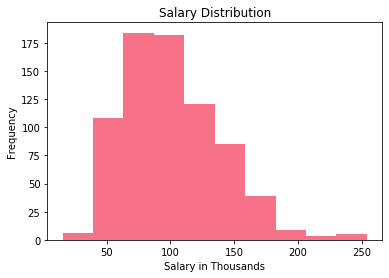

In [42]:
plt.xlabel('Salary in Thousands')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.hist(df['avg_salary'])

It looks like the salary is approximately normally distributed which is expected. There is a slight skew towards the high end of salary which also makes sense because there are some higher paying jobs for experienced data professionals

(array([ 10.,  11.,  33.,  60., 118., 167., 171.,  77.,  50.,  45.]),
 array([1.9 , 2.21, 2.52, 2.83, 3.14, 3.45, 3.76, 4.07, 4.38, 4.69, 5.  ]),
 <a list of 10 Patch objects>)

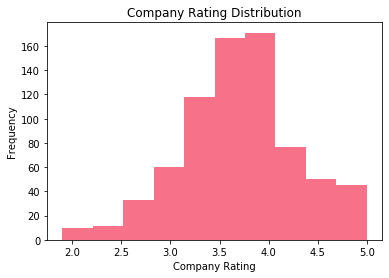

In [43]:
plt.xlabel('Company Rating')
plt.ylabel('Frequency')
plt.title('Company Rating Distribution')
plt.hist(df['company_rating'])

The distribution of the company rating is also normally distributed, which is what we expect. No company seems to have a rating significantly below 2 and there are a good amount of companies with a max rating of 5.

(array([352., 195.,  64.,  47.,   8.,  27.,  33.,   1.,  14.,   1.]),
 array([  1. ,  28.5,  56. ,  83.5, 111. , 138.5, 166. , 193.5, 221. ,
        248.5, 276. ]),
 <a list of 10 Patch objects>)

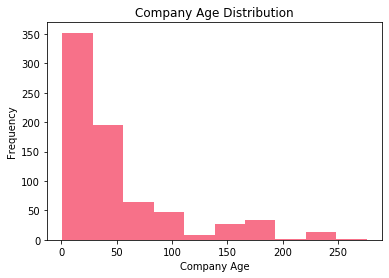

In [44]:
plt.xlabel('Company Age')
plt.ylabel('Frequency')
plt.title('Company Age Distribution')
plt.hist(df['company_age'])

The company age distribution has a heavy right skew and looks like it could resemble some sort of exponential distribution. From this, we can say that there are a lot more newer companies in the dataset, while there still are some old companies included as well that are up to 250 years old. 

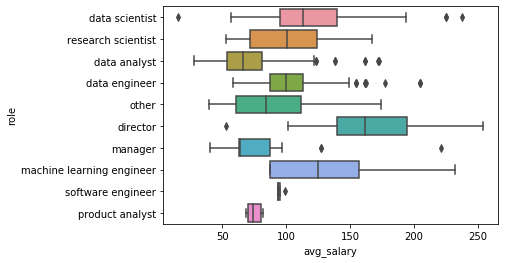

In [45]:
sns.boxplot(x = 'avg_salary', y='role', data = df)

This plot shows the average salary range and percentiles of the each of the job families found in the dataset. Directors have the highest upper bound and median, likely because they are more experienced employees. The next highest paying job is Machine Learning Engineer with a 75th percentile value slightly lower than that of the directors, as well as a lower median value. The next highest paid position was the Data Scientists. The Data Scientists had some outliers on the upper end that were within the upper range of the director salary, but the 75th percentile and median sits slightly below the machine learning engineer role. The manager role surprised me the most with 75% of the data points below a 100,000 dollar salary level. However, there was some significant outliers on the upper tail that were around 125,000 and 225,000 dollars. The individual contributer roles seemed like a good bet all around, with Data Scientists, Machine Learning ENgineers, Data Engineers, and Research Scientists all pulling in respectable coin.

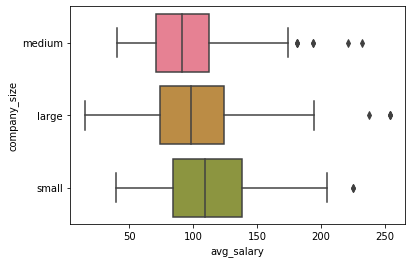

In [46]:
sns.boxplot(x = 'avg_salary', y='company_size', data = df)

This was another finding that surprised me. It seems that the small companies (<200 employees) are paying the highest salaries to data professionals with a median slightly above that of larger companies (1000+ employees). This could be the case that the smaller companies are hiring mainly for more senior roles since they don't have the capital to hire on junior data professionals, whereas larger companies have the money to take a risk with entry level talent. Lets dive into this question about seniority some more.

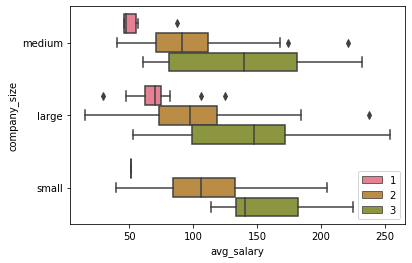

In [47]:
sns.boxplot(x = 'avg_salary', y='company_size', hue = 'seniority', data = df)
plt.legend(loc='lower right')

This box plot allows us to see the range of salaries for each level of seniority within each of the company sizes. To confirm my hypothesis, it looks like the the small companies were not hiring for many entry level roles, which explains the higher salary range for the smaller companies compared to the larger companies that have their entry level employees pulling down their average salary. As expected, the lower seniority roles (indicated by blue or 1), have the lowest salary ranges, with medium seniority (2 or orange) and high seniority (3 or green) having increasingly higher average salary ranges at all sizes of companies. Large companies have the highest median and 75th percentile for high seniority employees as well as the highest range for low seniority employees. Based on this data, my suggestion would be for low seniority employees to target larger companies, medium seniority employees to target small companies, and high seniority employees to target large companies to maximize their salary throughout their career. One confounding variable in this analysis could be the location of the small and large companies, as this could artifically inflate the salaries if they are in high cost of living areas.

In [48]:
# create a numeric variable for company size with small=1, medium=2, large=3

def map_company_size(value):
    if value == "small":
        return 1
    elif value == "medium":
        return 2
    elif value == "large":
        return 3
    # if the value is N/A we will impute this value later
    else:
        return -1
    
df['company_size'] = df['company_size'].apply(map_company_size)
df['company_size'] = df['company_size'].replace(to_replace = -1, value = np.nan)
df['company_size'].value_counts()

3.0    356
2.0    251
1.0    125
Name: company_size, dtype: int64

In [49]:
# impute company_size by using the mode value and most common company size to replace missing values
mode_size = df['company_size'].mode()[0]
df['company_size'] = df['company_size'].replace(to_replace = np.nan, value = mode_size)
df['company_size'].value_counts()

3.0    366
2.0    251
1.0    125
Name: company_size, dtype: int64

[Text(0.5, 0, 'seniority'),
 Text(1.5, 0, 'avg_salary'),
 Text(2.5, 0, 'company_rating'),
 Text(3.5, 0, 'company_size'),
 Text(4.5, 0, 'company_age')]

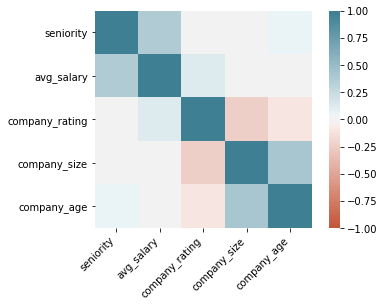

In [50]:
# Create a correlation matrix using only the numeric variables in the dataset
df_numeric = df[['seniority', 'avg_salary', 'company_rating', 'company_size', 'company_age']]
corr = df_numeric.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [51]:
corr

,seniority,avg_salary,company_rating,company_size,company_age
seniority,1.000000,0.370003,-0.005547,0.014102,0.054351
avg_salary,0.370003,1.000000,0.131463,-0.032504,0.024522
company_rating,-0.005547,0.131463,1.000000,-0.231477,-0.102560
company_size,0.014102,-0.032504,-0.231477,1.000000,0.423971
company_age,0.054351,0.024522,-0.102560,0.423971,1.000000


Larger companies and older companies seem to have lower company ratings (weak negative correlation). Seniority seems to have a moderate positive realtionship with salary as well which makes sense, as more experienced workers are paid more. Company rating seems to have a small positive correlation with salary as well, which would mean higher rated companies have a higher salary or vice versa. Rating also has a negative correlation with company size and age, so we can assume that older and larger companies have lower employee ratings.

In [52]:
# set the color pallet for the bar plots
sns.set_palette("husl", 8)

# look at the average salary for each role in the dataset
salary_by_role = df.groupby(['role'])['avg_salary'].mean().reset_index().sort_values('avg_salary', ascending = False)
salary_by_role

,role,avg_salary
3,director,168.346154
4,machine learning engineer,129.200000
2,data scientist,117.564516
1,data engineer,105.403361
8,research scientist,99.977273
9,software engineer,94.875000
6,other,88.685950
5,manager,81.475000
7,product analyst,74.833333
0,data analyst,73.027972


Directors have the highest average salary of around 168,000, followed by machine learning engineers with a salary around 129,000, and data scientists with a average salary of 117,000.

Text(0.5, 1.0, 'Salary by Role')

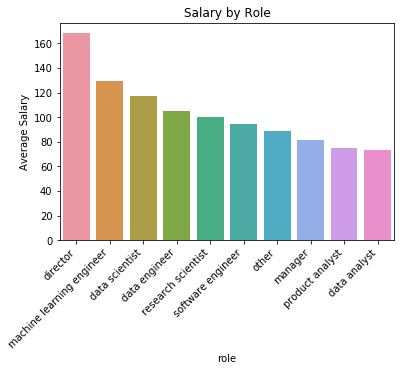

In [53]:
# create a plot that shows the salary for each role visually
ax = sns.barplot(x = 'role', y = 'avg_salary', data = salary_by_role)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylabel('Average Salary')
ax.set_title('Salary by Role')

I am curious how the location of the role plays a part in the salary package offered, so lets dive a little more into the location. I start by grouping the states into regions of the US by using the regions provided by the US Census 2020.

In [54]:
# Regions are based on the US census regions

# create an array of states for each US region
northeast = ['ME', 'NY', 'PA', 'VT', 'NH', 'CT', 'MA', 'RI', 'NJ']
south = ['MD', 'DE', 'VA', 'WV', 'NC', 'KY', 'SC', 'TN', 'GA', 'AL', 'MS', 'FL', 'AR', 'LA', 'OK', 'TX', 'DC']
midwest = ['ND', 'SD', 'NE', 'KS', 'MO', 'IA', 'MN', 'WI', 'IL', 'IN', 'OH', 'MI']
west = ['WA', 'ID', 'MT', 'WY', 'CO', 'UT', 'NM', 'AZ', 'NV', 'CA', 'OR', 'Los Angeles']

# make sure that we have 50 states accounted for (no Hawaii or Alaska)
len(south) + len(northeast) +len(midwest) + len(west)

50

In [55]:
# this function maps each state to its respective US region
def find_region(state_abbrev):
    if state_abbrev in northeast:
        return 'Northeast'
    elif state_abbrev in south:
        return 'South'
    elif state_abbrev in midwest:
        return 'Midwest'
    elif state_abbrev in west:
        return 'West'
    else:
        return 'other'
    
df['region'] = df['state'].apply(find_region)
# store the number of job listings in each region
region_freq = df.region.value_counts()


Text(0.5, 1.0, 'Breakdown of US Region Jobs')

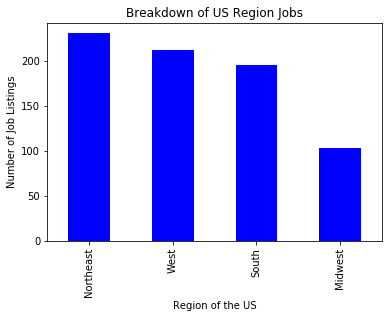

In [56]:
# plot the number of job listings in each region from the data
ax = region_freq.plot(kind='bar', color = 'b')
ax.set_ylabel('Number of Job Listings')
ax.set_xlabel('Region of the US')
ax.set_title('Breakdown of US Region Jobs')

It seems that many of the job listings in this dataset were located in the Northeastern region of the US, with the West and the South regions close behind. The Midwest region had the fewest number of job postings in this dataset, with only about 100 listings.

In [57]:
# lets see how the salary of each job family changes throughout the different regions of the US
df.groupby(['role', 'region'])['avg_salary'].mean()

role                       region   
data analyst               Midwest       59.722222
                           Northeast     79.481132
                           South         66.640625
                           West          75.575000
data engineer              Midwest      101.906250
                           Northeast    102.552632
                           South         99.085106
                           West         116.405405
data scientist             Midwest      112.191176
                           Northeast    113.390244
                           South        107.153846
                           West         129.826531
director                   Midwest      221.750000
                           Northeast    122.571429
machine learning engineer  Midwest      105.400000
                           Northeast    125.000000
                           South         87.000000
                           West         164.500000
manager                    Midwest       71.8

In [58]:
# look at the average salary by region
salary_by_region = df.groupby(['region'])['avg_salary'].mean().reset_index()
salary_by_region

,region,avg_salary
0,Midwest,96.466019
1,Northeast,101.755411
2,South,90.635204
3,West,113.658019


The Western region offers the highest average salaries at 113,000 followed by the Northeast region at 101,000 dollars. The Midwest and the South have the lower end of the average salaries. Much of this variation could be correlated with the cost of living in these specific regions. Many of the most expensive cities in the US are located in the West and Northeast (New York City, San Francisco, Los Angeles, Boston, etc).

Text(0.5, 1.0, 'Salaries By Region of US')

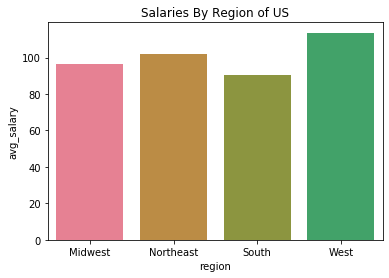

In [59]:
# plot the salaries by region
ax = sns.barplot(x = 'region', y= 'avg_salary', data = salary_by_region)
ax.set_title('Salaries By Region of US')

In [60]:
df.head()

,role,seniority,avg_salary,state,company_rating,company_size,sector,company_age,city,region
0,data scientist,2,72.0,NM,3.8,2.0,Aerospace & Defense,47.0,other,West
1,data scientist,2,87.5,MD,3.4,3.0,Health Care,36.0,other,South
2,data scientist,2,85.0,FL,4.8,2.0,Business Services,10.0,other,South
3,data scientist,2,76.5,WA,3.8,3.0,"Oil, Gas, Energy & Utilities",55.0,Richland,West
4,data scientist,2,114.5,NY,2.9,1.0,Business Services,22.0,New York,Northeast


Lets break down the types of workers in each of these regions to see if the seniority level plays a factor in the salary in each region.

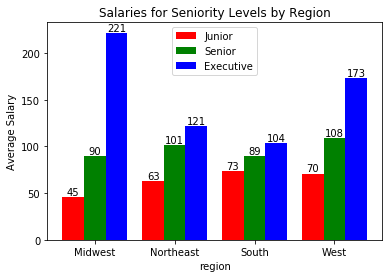

In [61]:
# salary broken down by seniority in each region

# grab the average salary of junior employees for each region
salary_region_jr = df[df['seniority']==1].groupby(['region'])['avg_salary'].mean().reset_index()
# grab the average salary of medium seniority employees for each region
salary_region_sr = df[df['seniority']==2].groupby(['region'])['avg_salary'].mean().reset_index()
# grab the average salary of high seniority employees for each region
salary_region_exec = df[df['seniority']==3].groupby(['region'])['avg_salary'].mean().reset_index()

# create the triple bar chart
fig = plt.figure()
ax = fig.add_subplot(111)
width = 0.27
ind = np.arange(4)

rects1 = ax.bar(ind, salary_region_jr.avg_salary, width, color='r')

rects2 = ax.bar(ind+width, salary_region_sr.avg_salary, width, color='g')

rects3 = ax.bar(ind+width*2, salary_region_exec.avg_salary, width, color='b')

ax.set_ylabel('Average Salary')
ax.set_xlabel('region')
ax.set_title('Salaries for Seniority Levels by Region')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Midwest', 'Northeast', 'South', 'West') )
ax.legend( (rects1[1], rects2[1], rects3[1]), ('Junior', 'Senior', 'Executive'), loc = 'upper center' )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.0*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


As expected, there is a fairly constant increase between each level of seniority across all 4 regions of the US. One exception to this pattern is the Midwest, which has a huge jump in salary between the medium and high seniority employees. The Midwest has highest salaries for high seniority workers, the West has the highest salaries for medium seniority workers, and the South has the highest average salaries for low seniority workers.

In [62]:
df[df['seniority']==1].groupby(['region'])['avg_salary'].mean().reset_index()

,region,avg_salary
0,Midwest,45.500000
1,Northeast,63.272727
2,South,73.800000
3,West,70.916667


Text(0.5, 1.0, 'Company Size By Region of US')

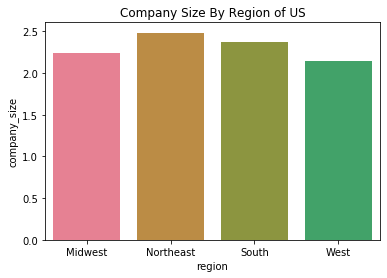

In [63]:
# average company size in each region
size_by_region = df.groupby(['region'])['company_size'].mean().reset_index()
ax = sns.barplot(x = 'region', y= 'company_size', data = size_by_region)
ax.set_title('Company Size By Region of US')

The company size of each region didn't vary as much as I expected. This probably has something to do with most of the job listings being from medium sized companies as well as imputing missing values as this medium category. However, we can still gain some insight from this. The Western region seems to have slightly smaller sized companies (many startups in Silicon Valley where the venture capital firms are), while the Northeast seems to have larger companies (many big banks and financial headquarters in New York City).

Text(0.5, 1.0, 'Seniority By Region of US')

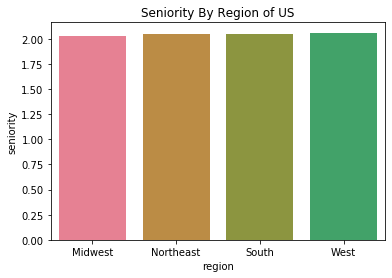

In [64]:
# number of each type of seniority in each region (where are the entry level roles?)
seniority_by_region = df.groupby(['region'])['seniority'].mean().reset_index()

ax = sns.barplot(x = 'region', y= 'seniority', data = seniority_by_region)
ax.set_title('Seniority By Region of US')

This visual doesn't tell us much since so much of the data is in the seniority 2 category, keeping the averages close to 2. The average employee in all regions is of medium seniority.

In [65]:
# this is sensible since over 88% of the data is medium seniority
df.seniority.value_counts()

2    654
3     63
1     25
Name: seniority, dtype: int64

I will try to drop the seniority 2 job postings to see if we can see some variation between the low and high seniority roles across the regions.

Text(0.5, 1.0, 'Seniority By Region of US (Excluding Category 2)')

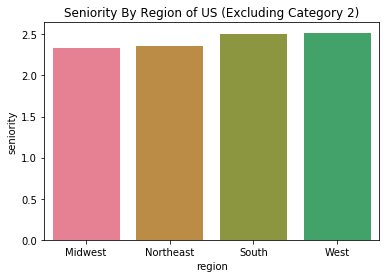

In [66]:
seniority_by_region_no_2 = df[df['seniority']!=2].groupby(['region'])['seniority'].mean().reset_index()
ax = sns.barplot(x = 'region', y= 'seniority', data = seniority_by_region_no_2)
ax.set_title('Seniority By Region of US (Excluding Category 2)')

Once again, this visual isn't very telling since more of the data is senior rather than junior roles. There is slightly more senior roles in the West and the South, but the difference is very small. Let's dive more into the cities of the job postings to see if there is any insights in the salary data across the main tech hubs of the US.

In [67]:
# look at avg salary in the 10 of the biggest cities and tech hubs for Data Scientist in the US
salary_by_top_city = df[df['city'].isin(['Austin', 'Boston', 'Chicago', 'Denver',
                                         'New York', 'San Francisco', 'Seattle', 
                                         'Bay Area', 'Charlotte', 'DC'])].groupby(['city'])['avg_salary'].mean().reset_index()
# convert the dataframe to a dictionary
salary_by_top_city = salary_by_top_city.set_index('city')['avg_salary'].to_dict()
salary_by_top_city

{'Austin': 120.4375,
 'Bay Area': 149.58928571428572,
 'Boston': 109.08450704225352,
 'Charlotte': 108.25,
 'Chicago': 126.765625,
 'DC': 110.18181818181819,
 'Denver': 97.9,
 'New York': 103.13636363636364,
 'San Francisco': 134.42105263157896,
 'Seattle': 90.7}

Text(0.5, 1.0, 'Average Salary in Top US Cities')

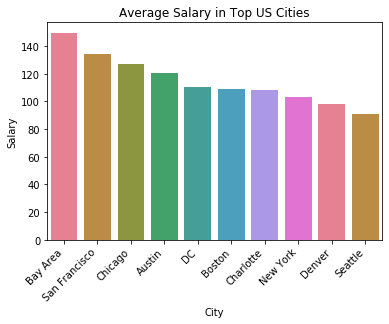

In [68]:
# create a barplot of the average salary in each of the top 10 chosen cities
salary_by_top_city_plot = pd.DataFrame(salary_by_top_city.items(), columns=['City', 'Salary'])

salary_by_top_city_plot.sort_values(by = ['Salary'], inplace = True, ascending = False)

ax = sns.barplot(x = 'City', y = 'Salary', data = salary_by_top_city_plot, palette = sns.color_palette("husl", 8))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Average Salary in Top US Cities')

It looks like the average salary is highest in the Silicon Valley area followed by Chicago. Out of these top 10 cities chosen for the analysis, the cost of living varies greatly across these regions. Lets try to control for the cost of living and get a standardized salary adjusted for the cost of living to compare these salaries on an even playing field. I will use the cost of living index for each city from the website: *https://www.expatistan.com/cost-of-living/index/north-america*

In [69]:
# adjust the salary in each location by the cost of living index
# Bay area was the average of San Jose and Mountainview

# create a dictionary that maps each city to the cost of living index
COL_index = {'Austin': 178, 'Bay Area': 241, 'Boston': 221, 'Charlotte': 175, 'Chicago': 206,
             'DC': 232, 'Denver': 204, 'New York': 270, 'San Francisco': 257, 'Seattle': 213}
# find the standardized salary value for each city by dividing the salary by the (cost of living index/100)
for key in COL_index.keys():
    salary_by_top_city[key] = salary_by_top_city[key]/(COL_index[key]/100)
# output the standardized salaries for each city    
salary_by_top_city

{'Austin': 67.66151685393258,
 'Bay Area': 62.07024303497332,
 'Boston': 49.35950544898349,
 'Charlotte': 61.857142857142854,
 'Chicago': 61.536711165048544,
 'DC': 47.49216300940439,
 'Denver': 47.990196078431374,
 'New York': 38.1986531986532,
 'San Francisco': 52.30391152979726,
 'Seattle': 42.58215962441315}

In [70]:
# convert the data into a dataframe for plotting
salary_by_top_city = pd.DataFrame(salary_by_top_city.items(), columns=['City', 'Salary'])

# order the salaries in descending order
salary_by_top_city.sort_values(by = ['Salary'], inplace = True, ascending = False)


Text(0.5, 1.0, 'Cost of Living Adjusted Average Salary in Top US Cities')

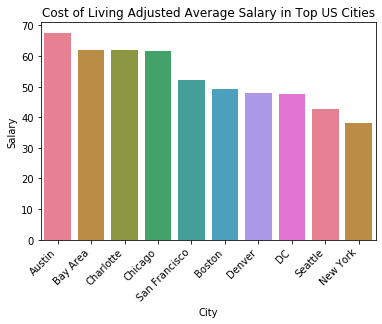

In [71]:
# create a barplot of the standardized salaries
ax = sns.barplot(x = 'City', y = 'Salary', data = salary_by_top_city, palette = sns.color_palette("husl", 8))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Cost of Living Adjusted Average Salary in Top US Cities')

I think this visual is very interesting, as we are able to see the cities where you can theoretically save the most of your salary. Austin is the leader of the board because of its high average salary combined with its low cost of living. The Bay Area is the runner up. It looks like the astronomically high salaries for data professionals in the Bay Area is still able to fend off the extremely high cost of living and stay high on the standardized salary leaderboard. Charlotte is in third place which is a great option for data workers that want to gravitate away from the typical tech hubs. Compared to many large cities, Charlotte offers a much lower cost of living while still keeping the salaries very high and is a great option from first hand experience.

Lets now look at the sectors and see which industry sectors provide the highest salaries.

In [72]:
df['sector'].value_counts()


Information Technology          180
Biotech & Pharmaceuticals       112
Business Services                97
other                            71
Insurance                        69
Health Care                      49
Finance                          42
Manufacturing                    34
Aerospace & Defense              25
Education                        23
Retail                           15
Oil, Gas, Energy & Utilities     14
Government                       11
Name: sector, dtype: int64

In [73]:
salary_by_sector = df.groupby(['sector'])['avg_salary'].mean().reset_index().sort_values('avg_salary', ascending = False)
salary_by_sector

,sector,avg_salary
7,Information Technology,113.191667
1,Biotech & Pharmaceuticals,112.120536
8,Insurance,105.942029
3,Education,100.739130
11,Retail,99.666667
0,Aerospace & Defense,99.060000
4,Finance,98.035714
2,Business Services,97.701031
12,other,91.985915
9,Manufacturing,84.044118


Text(0.5, 1.0, 'Average Salary for Top US Sectors')

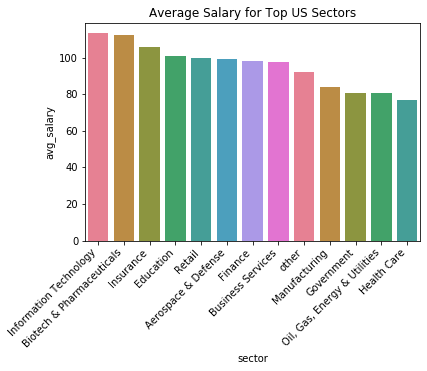

In [74]:
# create a barplot of the average salary in each main industry sector
ax = sns.barplot(x = 'sector', y = 'avg_salary', data = salary_by_sector, palette = sns.color_palette("husl", 8))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Average Salary for Top US Sectors')

In [75]:
# export the dataframe to a CSV for use in the final modeling phase of the project
df.to_csv('data_for_modeling.csv', index = False)

The Information Technology sector offers the most competitive salaries, followed by Biotech/Pharmaceuticals and Insurance, all with average salaries north of 100,000 dollars. The sectors with the least competitive salaries are Health care, Energy, and Government, with salaries around 80,000 dollars.

### Conclusions

Based on this analysis, it makes a lot of sense for an entry level or mid career job seeker to pursue Data Scientist or Machine Learning Engineer roles in Austin, TX or the Bay Area, CA at companies within the Technology or Biotech sectors to maximize their takehome salaries after factoring cost of living expenses